Import package

In [1]:
import package_.preprocessing as preprocessing
import package_.featureSelection as featureSelection
import package_.classifier as classifier
import package_.ensemble as ensemble
import package_.performanceMetrics as performanceMetrics

Preprocessing

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
pr = preprocessing.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [4]:
X, y = pr.set_target('class')

In [5]:
pr.standardization()

Feature Selection

Lasso

In [6]:
lasso_features = featureSelection.FeatureSelection(X, y, 'lasso', 100)

In [7]:
lasso_features.show_features()

0       SFTPC
1      SLC6A4
2      CLDN18
3        AGER
4       ITLN2
5        LGI3
6    C13orf36
7      FAM83A
8       FABP4
9        HBA1
Name: Lasso, dtype: object


In [8]:
lasso_features = lasso_features.get_features()

ReliefF

In [9]:
relieff_features = featureSelection.FeatureSelection(X, y, 'relieff', 100)

In [10]:
relieff_features.show_features()

0         CELA2B
1          OR6K3
2    CCL14-CCL15
3         MAGEA2
4           PDX1
5          CHRM2
6         TFAP2D
7         SPHKAP
8            OTC
9         HOTAIR
Name: ReliefF, dtype: object


In [11]:
relieff_features = relieff_features.get_features()

Mrmr

In [12]:
mrmr_features = featureSelection.FeatureSelection(X, y, 'mrmr', 100)

100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


In [13]:
mrmr_features.show_features()

0     PAICS
1    ANGPT4
2     GOLM1
3    SH3GL3
4     HTR3C
5     OR6K3
6      MYOC
7    CELA2B
8       MDK
9     OVCH1
Name: Mrmr, dtype: object


In [14]:
mrmr_features = mrmr_features.get_features()

uTest

In [15]:
uTest_features = featureSelection.FeatureSelection(X, y, 'uTest', 100)

In [16]:
uTest_features.show_features()

0     LRRTM4
1     TRIM46
2    PABPC1L
3      CD79A
4      GIPC2
5       NTN4
6       XKRX
7      SVEP1
8    GPR109B
9     DPYSL2
Name: Mann-Whitney U-test, dtype: object


In [17]:
uTest_features = uTest_features.get_features()

Classifier

Lasso

In [18]:
clf_lasso = classifier.Classifier(X, y, features=lasso_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [19]:
pm_lasso = performanceMetrics.PerformanceMetrics(clf_lasso)
# pm_lasso.all_metrics()

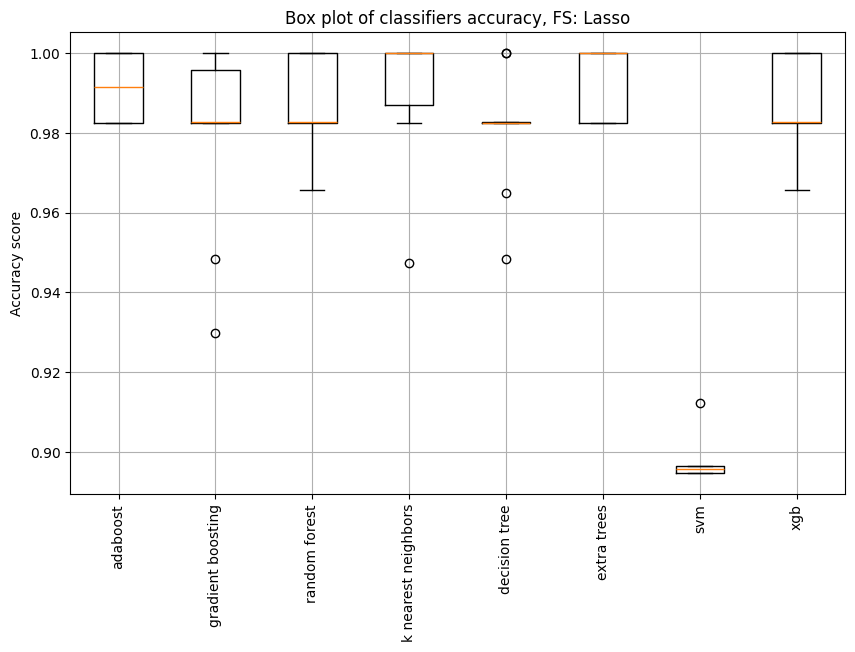

In [20]:
pm_lasso.plot_classifier_acc()

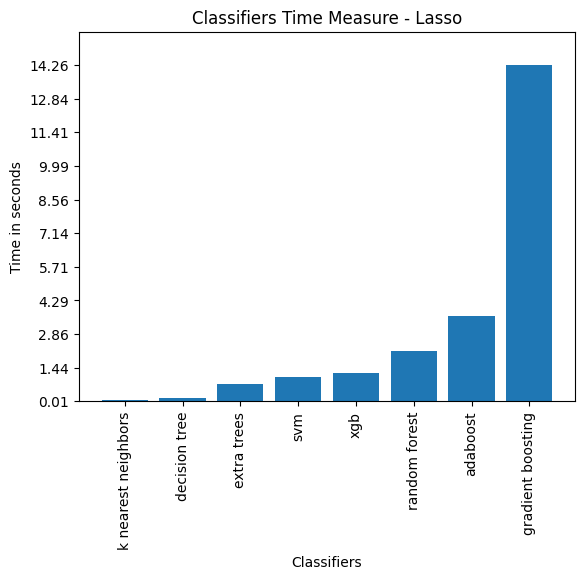

k nearest neighbors: 0.05214405059814453 s.
decision tree: 0.16144609451293945 s.
extra trees: 0.7556283473968506 s.
svm: 1.0257651805877686 s.
xgb: 1.2129957675933838 s.
random forest: 2.152008056640625 s.
adaboost: 3.6078178882598877 s.
gradient boosting: 14.25025749206543 s.


In [21]:
pm_lasso.plot_classifier_time()

Relieff

In [22]:
clf_relieff = classifier.Classifier(X, y, features=relieff_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [23]:
pm_relieff = performanceMetrics.PerformanceMetrics(clf_relieff)
pm_relieff.all_metrics()

["ACC: {'adaboost': 0.99, 'gradient boosting': 0.975, 'random forest': 0.988, 'k nearest neighbors': 0.986, 'decision tree': 0.956, 'extra trees': 0.988, 'svm': 0.897, 'xgb': 0.983}",
 "Roc Auc: {'adaboost': 0.987, 'gradient boosting': 0.909, 'random forest': 0.969, 'k nearest neighbors': 0.983, 'decision tree': 0.906, 'extra trees': 0.977, 'svm': 0.5, 'xgb': 0.959}",
 "F1 score: {'adaboost': 0.994, 'gradient boosting': 0.986, 'random forest': 0.993, 'k nearest neighbors': 0.992, 'decision tree': 0.975, 'extra trees': 0.993, 'svm': 0.946, 'xgb': 0.99}",
 "MCC: {'adaboost': 0.952, 'gradient boosting': 0.858, 'random forest': 0.935, 'k nearest neighbors': 0.93, 'decision tree': 0.781, 'extra trees': 0.939, 'svm': 0.0, 'xgb': 0.915}",
 "MSE: {'adaboost': 0.01, 'gradient boosting': 0.025, 'random forest': 0.012, 'k nearest neighbors': 0.014, 'decision tree': 0.044, 'extra trees': 0.012, 'svm': 0.103, 'xgb': 0.017}"]

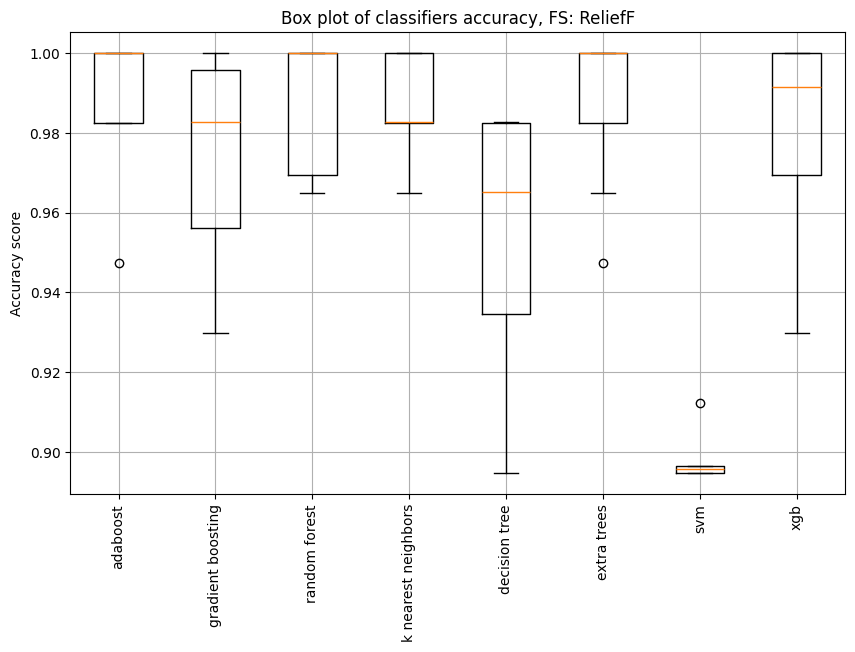

In [24]:
pm_relieff.plot_classifier_acc()

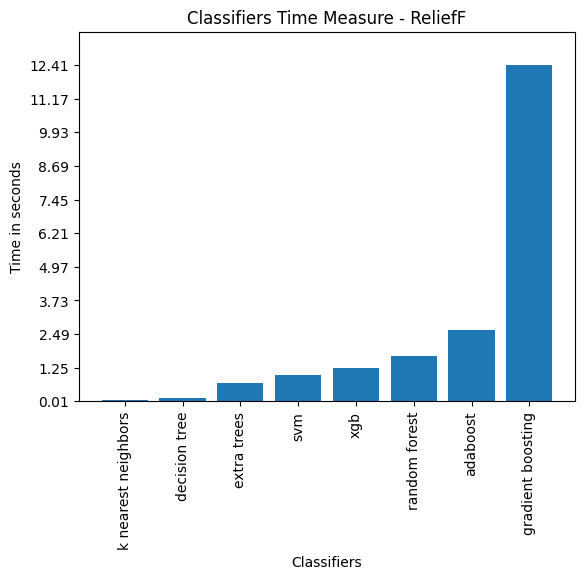

k nearest neighbors: 0.047342538833618164 s.
decision tree: 0.14598536491394043 s.
extra trees: 0.7042372226715088 s.
svm: 0.9963805675506592 s.
xgb: 1.2561836242675781 s.
random forest: 1.668560266494751 s.
adaboost: 2.6337687969207764 s.
gradient boosting: 12.404226303100586 s.


In [25]:
pm_relieff.plot_classifier_time()

Mrmr

In [26]:
clf_mrmr = classifier.Classifier(X, y, features=mrmr_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [27]:
pm_mrmr = performanceMetrics.PerformanceMetrics(clf_mrmr)
pm_mrmr.all_metrics()

["ACC: {'adaboost': 0.991, 'gradient boosting': 0.97, 'random forest': 0.988, 'k nearest neighbors': 0.99, 'decision tree': 0.969, 'extra trees': 0.995, 'svm': 0.897, 'xgb': 0.99}",
 "Roc Auc: {'adaboost': 0.971, 'gradient boosting': 0.901, 'random forest': 0.969, 'k nearest neighbors': 0.978, 'decision tree': 0.913, 'extra trees': 0.981, 'svm': 0.5, 'xgb': 0.963}",
 "F1 score: {'adaboost': 0.995, 'gradient boosting': 0.984, 'random forest': 0.993, 'k nearest neighbors': 0.994, 'decision tree': 0.982, 'extra trees': 0.997, 'svm': 0.946, 'xgb': 0.994}",
 "MCC: {'adaboost': 0.952, 'gradient boosting': 0.843, 'random forest': 0.933, 'k nearest neighbors': 0.944, 'decision tree': 0.835, 'extra trees': 0.971, 'svm': 0.0, 'xgb': 0.942}",
 "MSE: {'adaboost': 0.009, 'gradient boosting': 0.03, 'random forest': 0.012, 'k nearest neighbors': 0.01, 'decision tree': 0.031, 'extra trees': 0.005, 'svm': 0.103, 'xgb': 0.01}"]

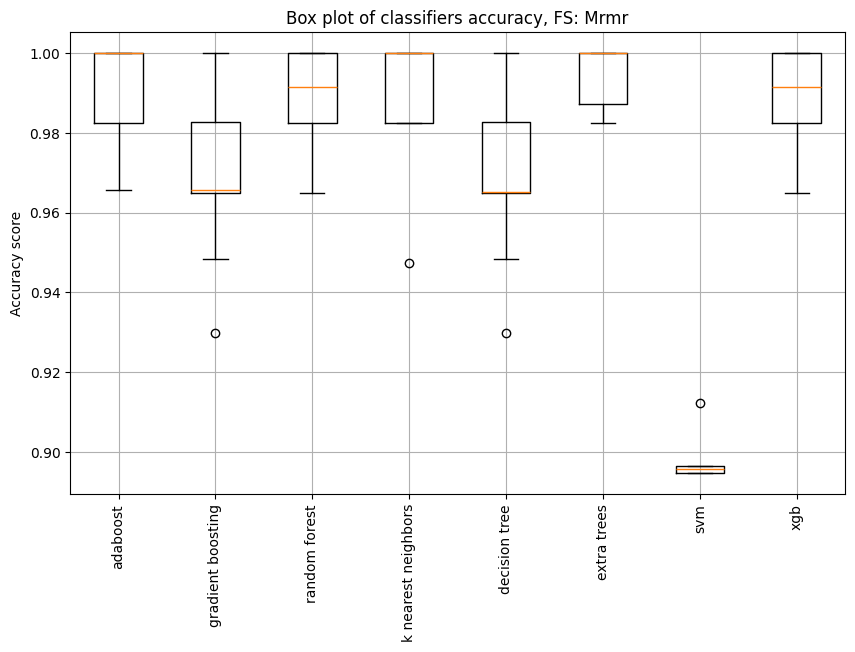

In [28]:
pm_mrmr.plot_classifier_acc()

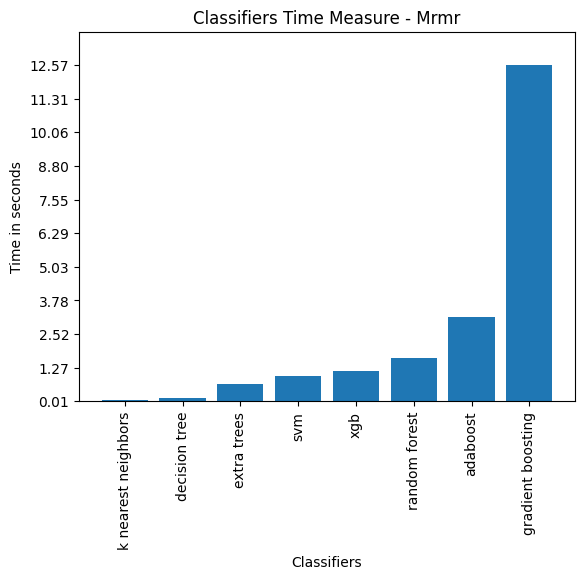

k nearest neighbors: 0.04565310478210449 s.
decision tree: 0.14335989952087402 s.
extra trees: 0.6488978862762451 s.
svm: 0.943946361541748 s.
xgb: 1.128833293914795 s.
random forest: 1.6122238636016846 s.
adaboost: 3.144818067550659 s.
gradient boosting: 12.560987949371338 s.


In [29]:
pm_mrmr.plot_classifier_time()

uTest

In [30]:
clf_uTest = classifier.Classifier(X, y, features=uTest_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [31]:
pm_uTest = performanceMetrics.PerformanceMetrics(clf_uTest)
pm_uTest.all_metrics()

["ACC: {'adaboost': 0.988, 'gradient boosting': 0.986, 'random forest': 0.99, 'k nearest neighbors': 0.983, 'decision tree': 0.988, 'extra trees': 0.986, 'svm': 0.897, 'xgb': 0.991}",
 "Roc Auc: {'adaboost': 0.962, 'gradient boosting': 0.961, 'random forest': 0.956, 'k nearest neighbors': 0.974, 'decision tree': 0.969, 'extra trees': 0.946, 'svm': 0.5, 'xgb': 0.971}",
 "F1 score: {'adaboost': 0.993, 'gradient boosting': 0.992, 'random forest': 0.994, 'k nearest neighbors': 0.99, 'decision tree': 0.993, 'extra trees': 0.992, 'svm': 0.946, 'xgb': 0.995}",
 "MCC: {'adaboost': 0.934, 'gradient boosting': 0.927, 'random forest': 0.941, 'k nearest neighbors': 0.912, 'decision tree': 0.935, 'extra trees': 0.919, 'svm': 0.0, 'xgb': 0.952}",
 "MSE: {'adaboost': 0.012, 'gradient boosting': 0.014, 'random forest': 0.01, 'k nearest neighbors': 0.017, 'decision tree': 0.012, 'extra trees': 0.014, 'svm': 0.103, 'xgb': 0.009}"]

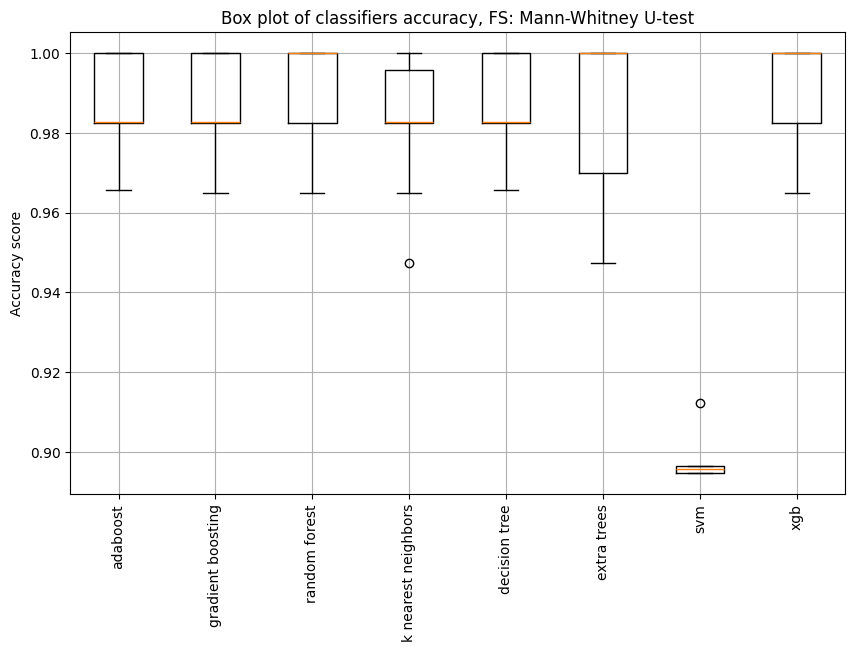

In [32]:
pm_uTest.plot_classifier_acc()

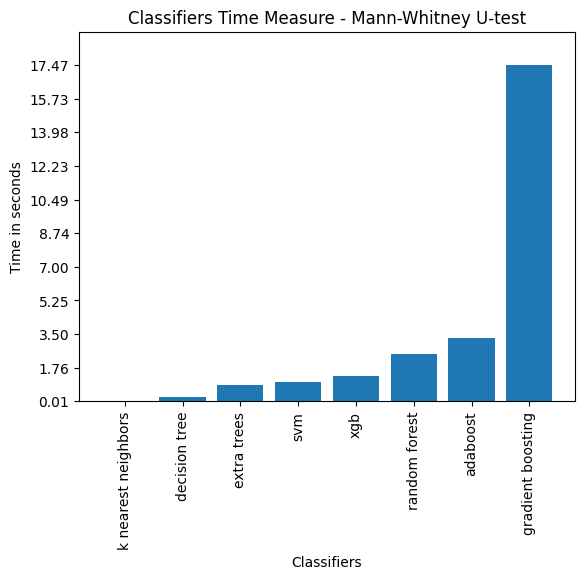

k nearest neighbors: 0.05017733573913574 s.
decision tree: 0.22907471656799316 s.
extra trees: 0.857774019241333 s.
svm: 1.0311517715454102 s.
xgb: 1.3438189029693604 s.
random forest: 2.486588954925537 s.
adaboost: 3.3015623092651367 s.
gradient boosting: 17.46419358253479 s.


In [33]:
pm_uTest.plot_classifier_time()

Ensemble

Lasso

In [34]:
ens_lasso = ensemble.Ensemble(X, y, features=lasso_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [35]:
pm_ens_lasso = performanceMetrics.PerformanceMetrics(ens_lasso)
pm_ens_lasso.all_metrics()

["ACC: {'voting': 0.991, 'bagging': 0.995, 'stacking': 0.988}",
 "Roc Auc: {'voting': 0.964, 'bagging': 0.981, 'stacking': 0.947}",
 "F1 score: {'voting': 0.995, 'bagging': 0.997, 'stacking': 0.993}",
 "MCC: {'voting': 0.951, 'bagging': 0.971, 'stacking': 0.932}",
 "MSE: {'voting': 0.009, 'bagging': 0.005, 'stacking': 0.012}"]

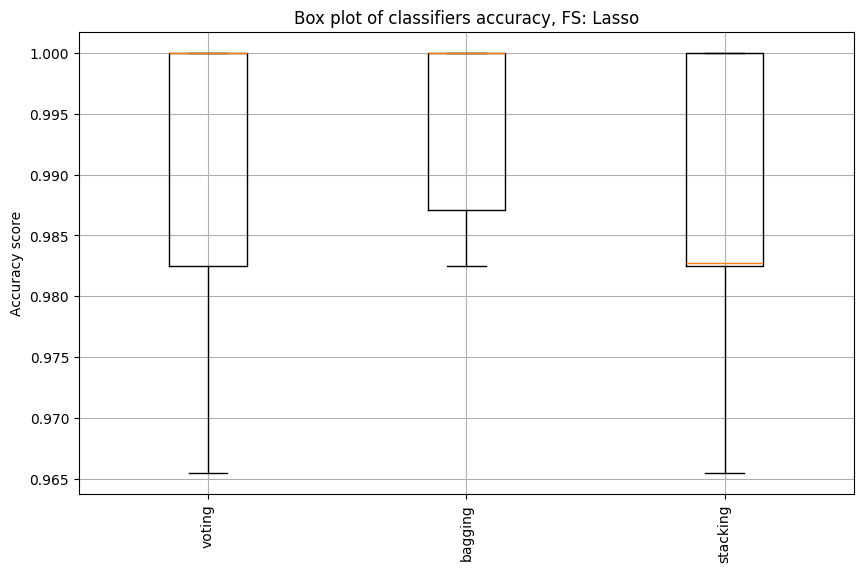

In [36]:
pm_ens_lasso.plot_classifier_acc()

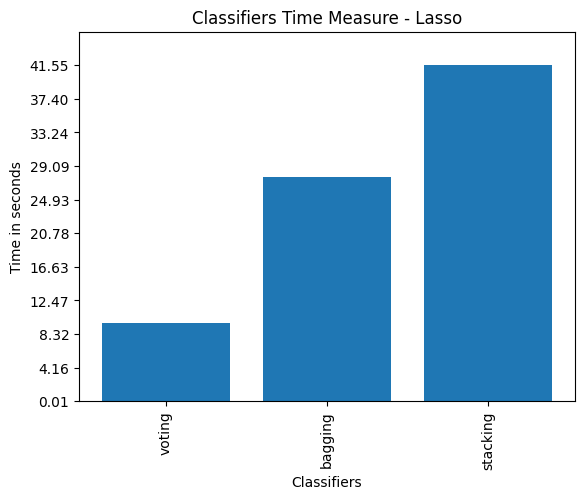

voting: 9.617486715316772 s.
bagging: 27.75306534767151 s.
stacking: 41.53902745246887 s.


In [37]:
pm_ens_lasso.plot_classifier_time()

Relieff

In [38]:
ens_relieff = ensemble.Ensemble(X, y, features=relieff_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [39]:
pm_ens_relieff = performanceMetrics.PerformanceMetrics(ens_relieff)
pm_ens_relieff.all_metrics()

["ACC: {'voting': 0.986, 'bagging': 0.99, 'stacking': 0.986}",
 "Roc Auc: {'voting': 0.976, 'bagging': 0.978, 'stacking': 0.968}",
 "F1 score: {'voting': 0.992, 'bagging': 0.994, 'stacking': 0.992}",
 "MCC: {'voting': 0.935, 'bagging': 0.945, 'stacking': 0.929}",
 "MSE: {'voting': 0.014, 'bagging': 0.01, 'stacking': 0.014}"]

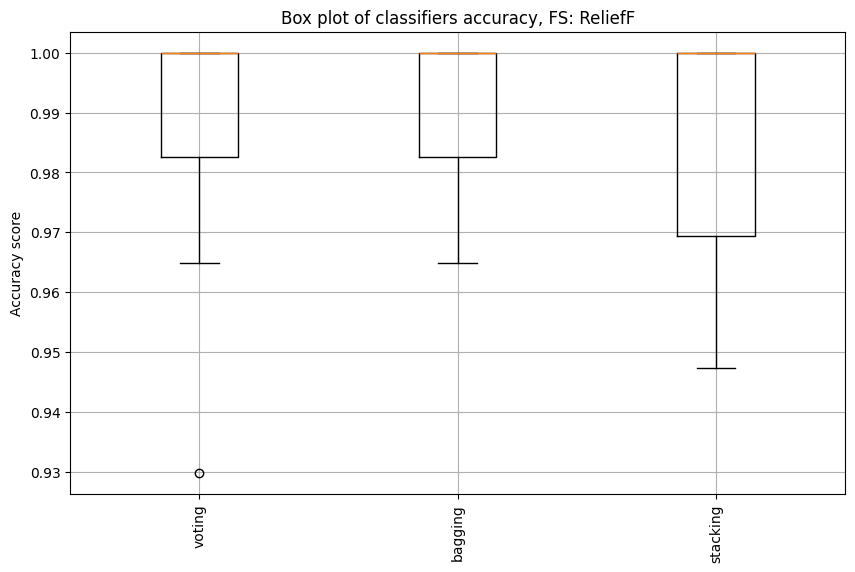

In [40]:
pm_ens_relieff.plot_classifier_acc()

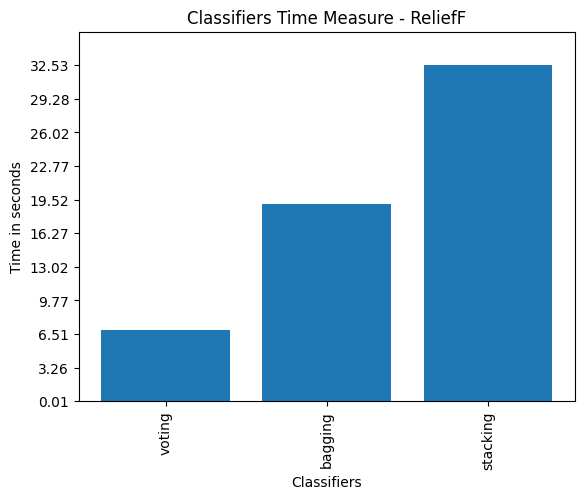

voting: 6.918848752975464 s.
bagging: 19.116247177124023 s.
stacking: 32.51789140701294 s.


In [41]:
pm_ens_relieff.plot_classifier_time()

Mrmr

In [42]:
ens_mrmr = ensemble.Ensemble(X, y, features=mrmr_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [43]:
pm_ens_mrmr = performanceMetrics.PerformanceMetrics(ens_mrmr)
pm_ens_mrmr.all_metrics()

["ACC: {'voting': 0.991, 'bagging': 0.99, 'stacking': 0.99}",
 "Roc Auc: {'voting': 0.971, 'bagging': 0.963, 'stacking': 0.963}",
 "F1 score: {'voting': 0.995, 'bagging': 0.994, 'stacking': 0.994}",
 "MCC: {'voting': 0.953, 'bagging': 0.942, 'stacking': 0.942}",
 "MSE: {'voting': 0.009, 'bagging': 0.01, 'stacking': 0.01}"]

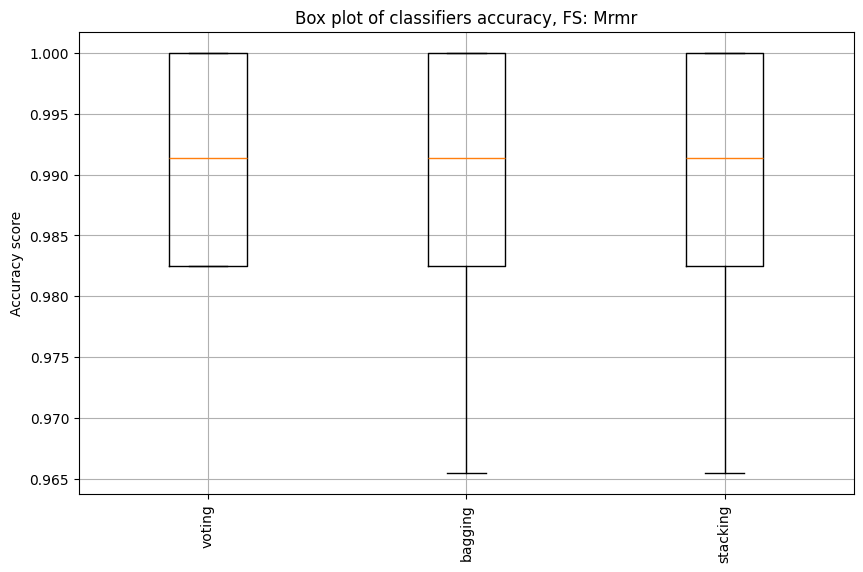

In [44]:
pm_ens_mrmr.plot_classifier_acc()

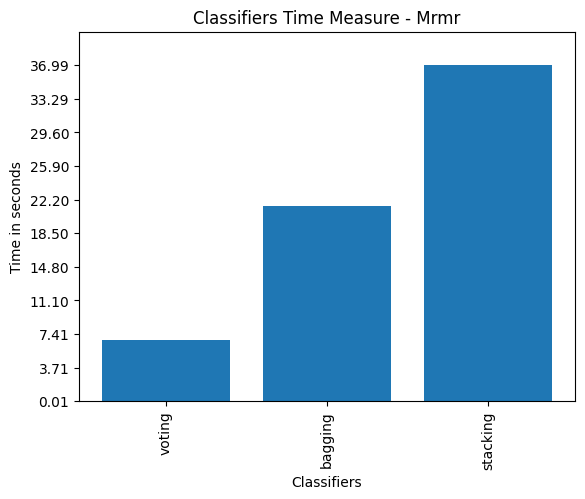

voting: 6.735826730728149 s.
bagging: 21.47891879081726 s.
stacking: 36.9814772605896 s.


In [45]:
pm_ens_mrmr.plot_classifier_time()

uTest

In [46]:
ens_uTest = ensemble.Ensemble(X, y, features=uTest_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [47]:
pm_ens_uTest = performanceMetrics.PerformanceMetrics(ens_uTest)
pm_ens_uTest.all_metrics()

["ACC: {'voting': 0.991, 'bagging': 0.995, 'stacking': 0.991}",
 "Roc Auc: {'voting': 0.971, 'bagging': 0.981, 'stacking': 0.971}",
 "F1 score: {'voting': 0.995, 'bagging': 0.997, 'stacking': 0.995}",
 "MCC: {'voting': 0.952, 'bagging': 0.971, 'stacking': 0.952}",
 "MSE: {'voting': 0.009, 'bagging': 0.005, 'stacking': 0.009}"]

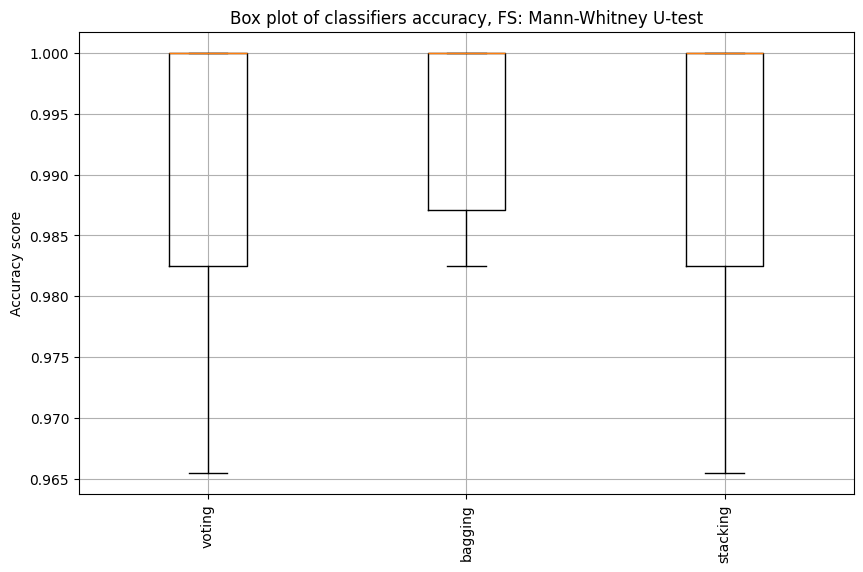

In [48]:
pm_ens_uTest.plot_classifier_acc()

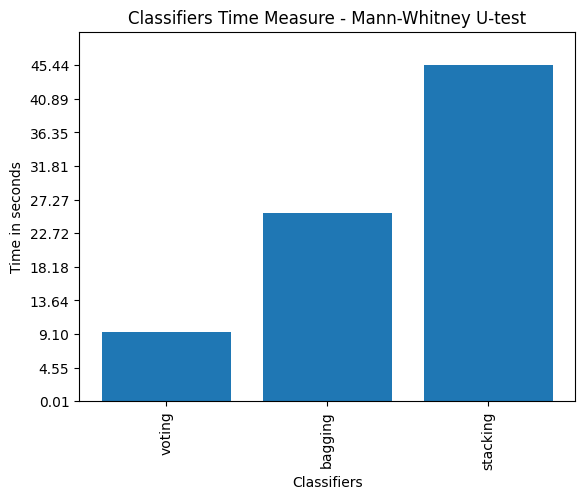

voting: 9.40511441230774 s.
bagging: 25.39891266822815 s.
stacking: 45.42660856246948 s.


In [49]:
pm_ens_uTest.plot_classifier_time()